## Handling Missing Value with Python

        Different Ways to handle missing value in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


In [2]:
diabetes = pd.read_csv('../Python_Missing_Value/diabetes.csv',sep=',')

#Future Use
diabetes_mean = diabetes.copy(deep=True)
diabetes_median = diabetes.copy(deep=True)
diabetes_mode = diabetes.copy(deep=True)
diabetes_constant = diabetes.copy(deep=True)
diabetes_cp = diabetes.copy(deep=True)

In [3]:
diabetes.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [4]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


#### Finding the type of null value in the BMI column:
    
    This is to ensure instead of 0 if there is any other null value present.

In [6]:
diabetes_bmi_unique = diabetes['BMI'].unique()
print(np.sort(diabetes_bmi_unique))

[18.2 18.4 19.1 19.3 19.4 19.5 19.6 19.9 20.  20.1 20.4 20.8 21.  21.1
 21.2 21.7 21.8 21.9 22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.9 23.  23.1
 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24.3 24.4 24.5
 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5 25.6 25.8 25.9 26.
 26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9 27.  27.1 27.2 27.3 27.4
 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4 28.5 28.6 28.7 28.8
 28.9 29.  29.2 29.3 29.5 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3 30.4
 30.5 30.7 30.8 30.9 31.  31.1 31.2 31.3 31.6 31.9 32.  32.1 32.2 32.3
 32.4 32.5 32.6 32.7 32.8 32.9 33.1 33.2 33.3 33.5 33.6 33.7 33.8 33.9
 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2 35.3
 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6 36.7
 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1
 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5
 39.6 39.7 39.8 39.9 40.  40.1 40.2 40.5 40.6 40.7 40.8 40.9 41.  41.2
 41.3 4

#### BMI Column contaning Nan values

In [7]:
zero_bmi = diabetes.BMI[diabetes.BMI==0]
print(zero_bmi)

Series([], Name: BMI, dtype: float64)


#### Converting 0 to Nan 

In [8]:
diabetes.BMI[diabetes.BMI==0]=np.nan

# Checking for the rows with Nan values
print(diabetes.BMI[np.isnan(diabetes.BMI)])

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64


#### Loading the airquality 

In [9]:
air_quality = pd.read_csv('../Python_Missing_Value/air-quality.csv',sep=",",parse_dates=['Date'],index_col='Date')

In [10]:
air_quality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [11]:
air_quality_null = air_quality.isnull()
print('\n')
print('Total null value is \n',air_quality_null.sum())
print('\n')
print('Percentage of null is \n',air_quality_null.mean()*100)



Total null value is 
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64


Percentage of null is 
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


#### Visulaize Missing number using bar plot:
    
    Import missing number package

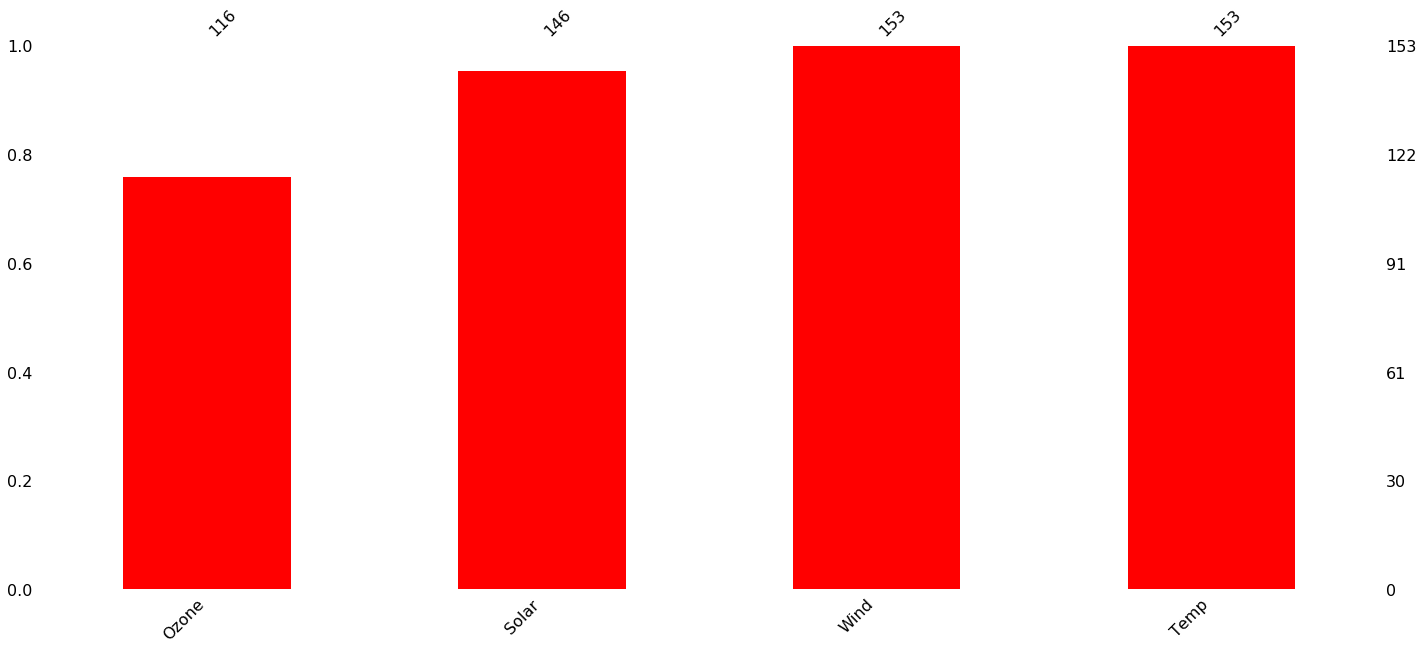

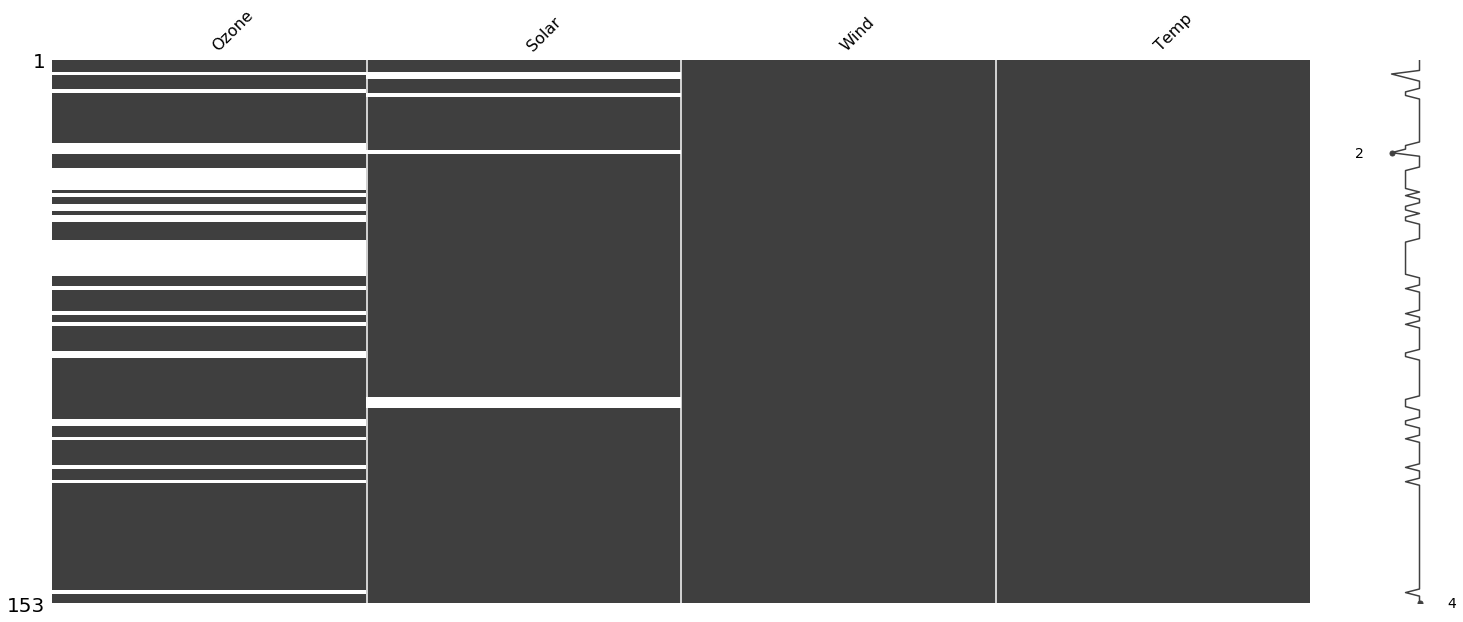

In [12]:
import missingno as msno


msno.bar(air_quality,color='red')
msno.matrix(air_quality)

#### Monthly Missing Value for data visulaization

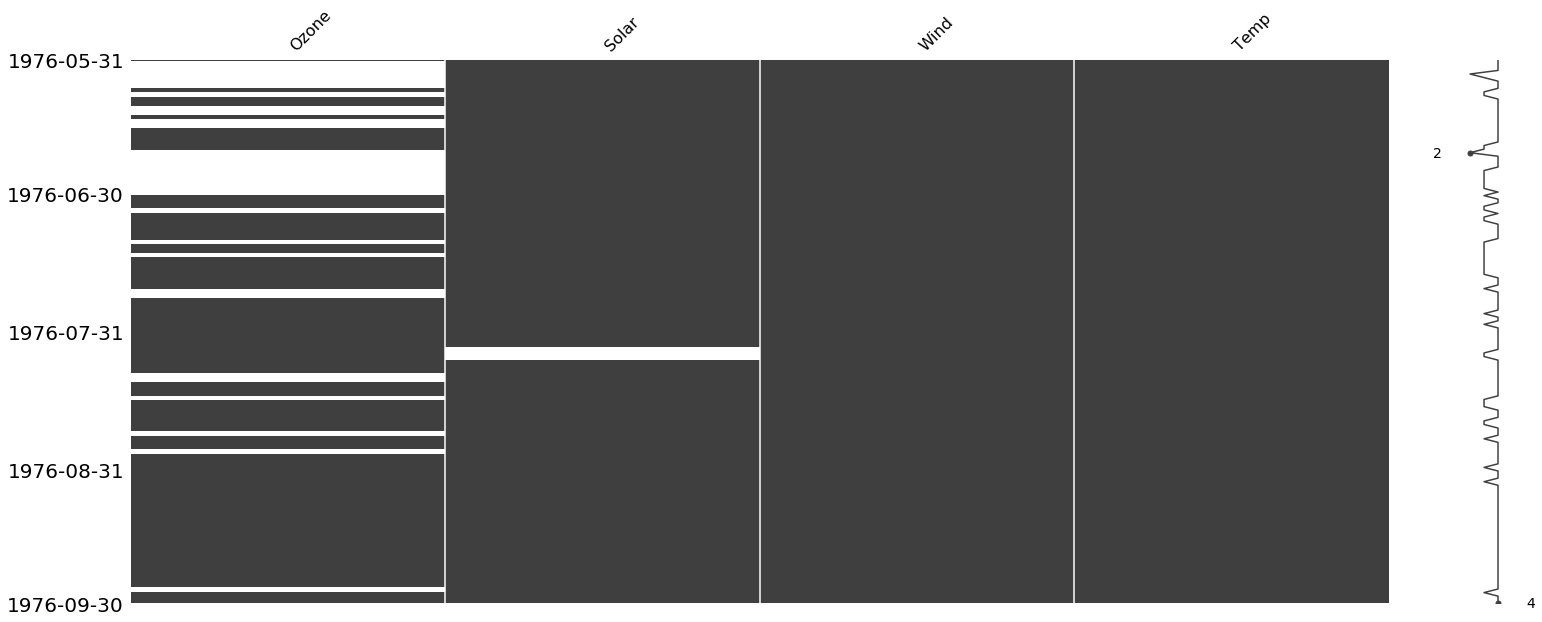

In [13]:
msno.matrix(air_quality,freq='M')

#### Nullity Check for particular Month

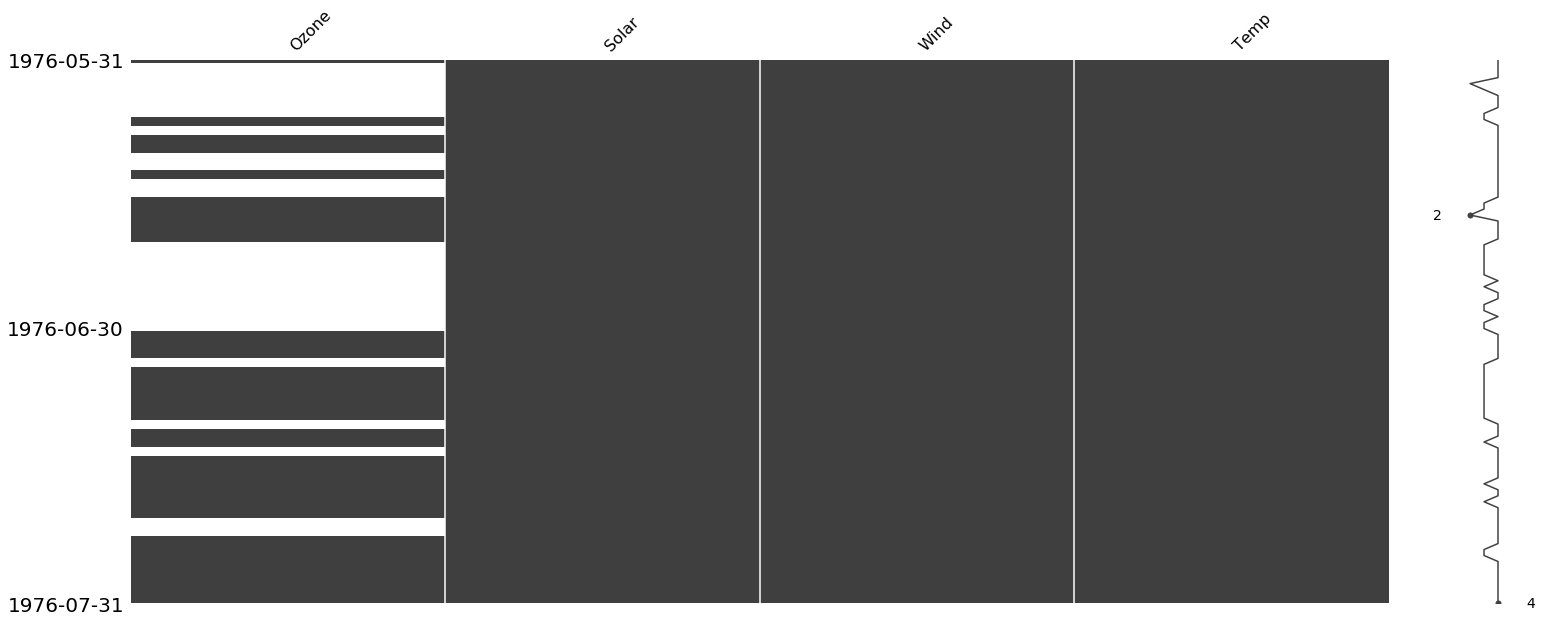

In [14]:
msno.matrix(air_quality.loc['May-1976':'Jul-1976'],freq='M')

### Missing at Random:

        
        BMI,Glucose and Diastolic_BP is missing at random.

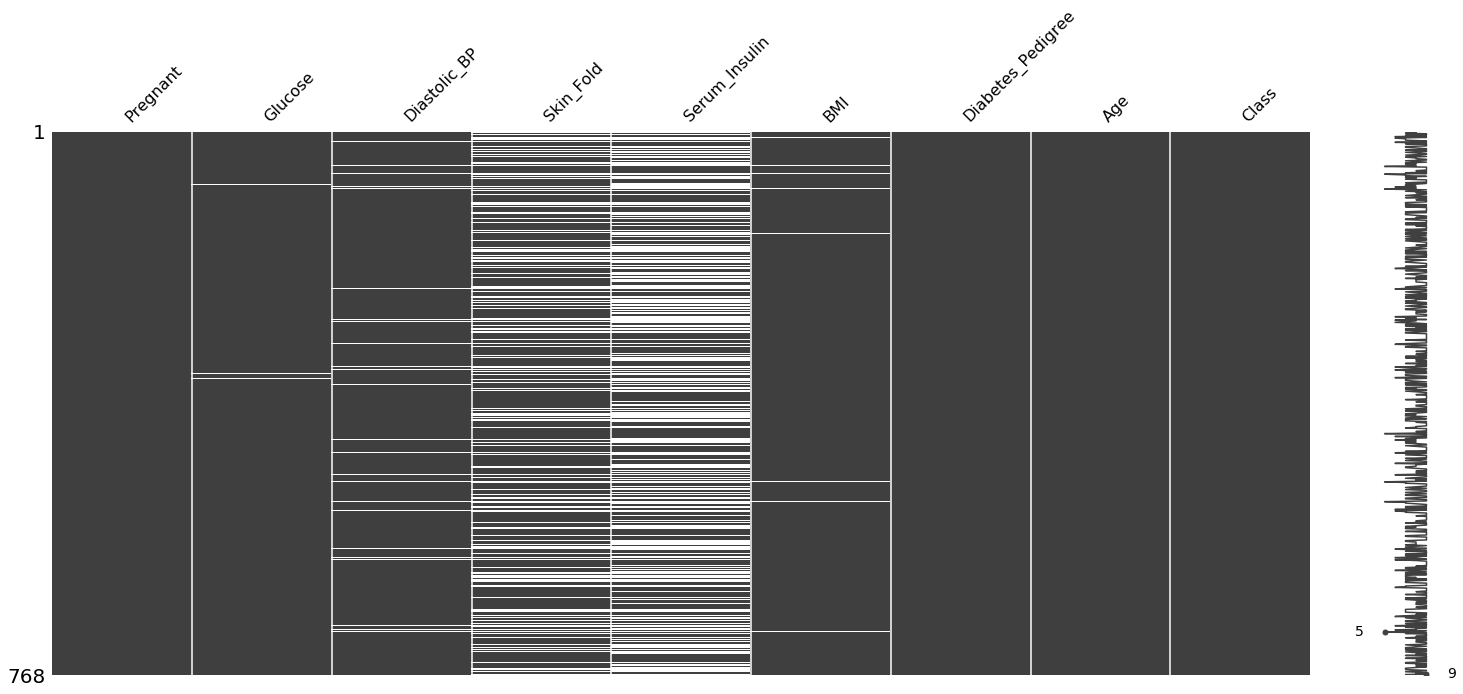

In [15]:
msno.matrix(diabetes)

#### MNAR:
    
    Missing Not a Random

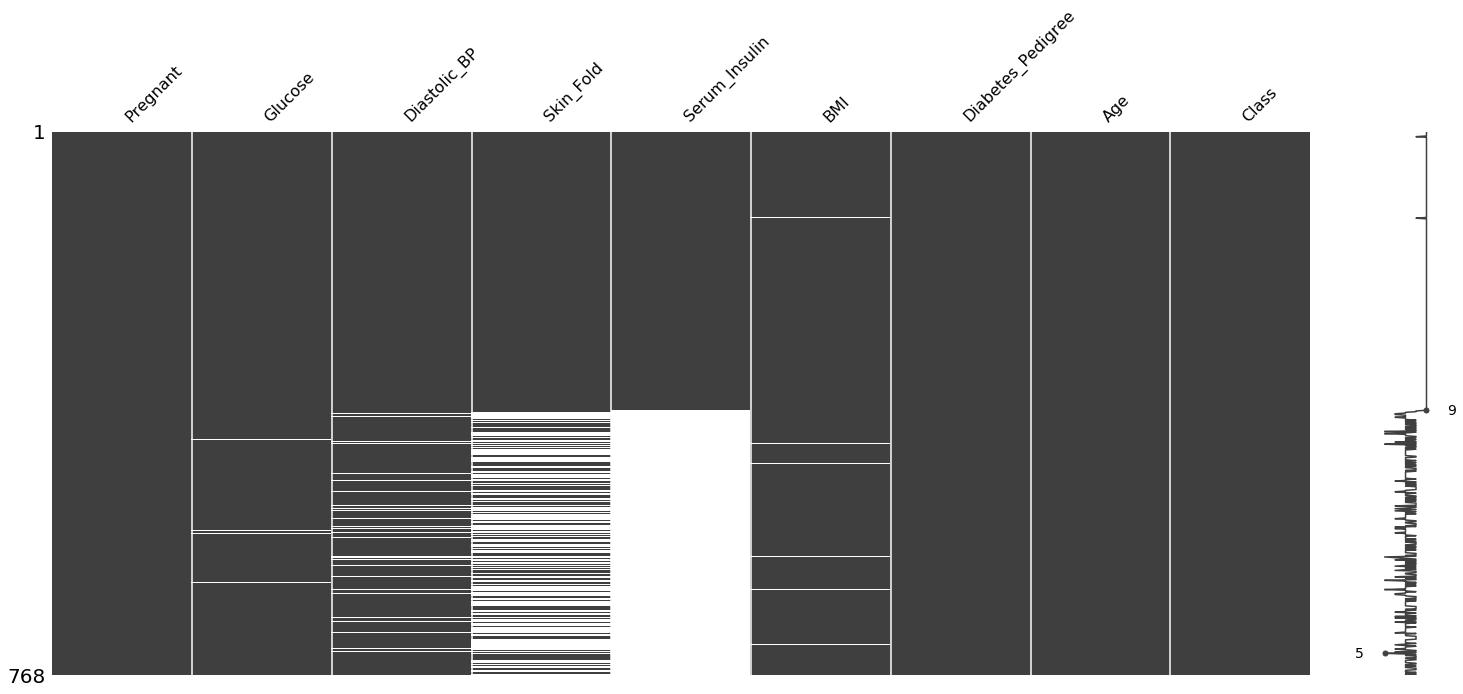

In [16]:
sorted_serum = diabetes.sort_values('Serum_Insulin')
msno.matrix(sorted_serum)

#### Finding missing pattern 

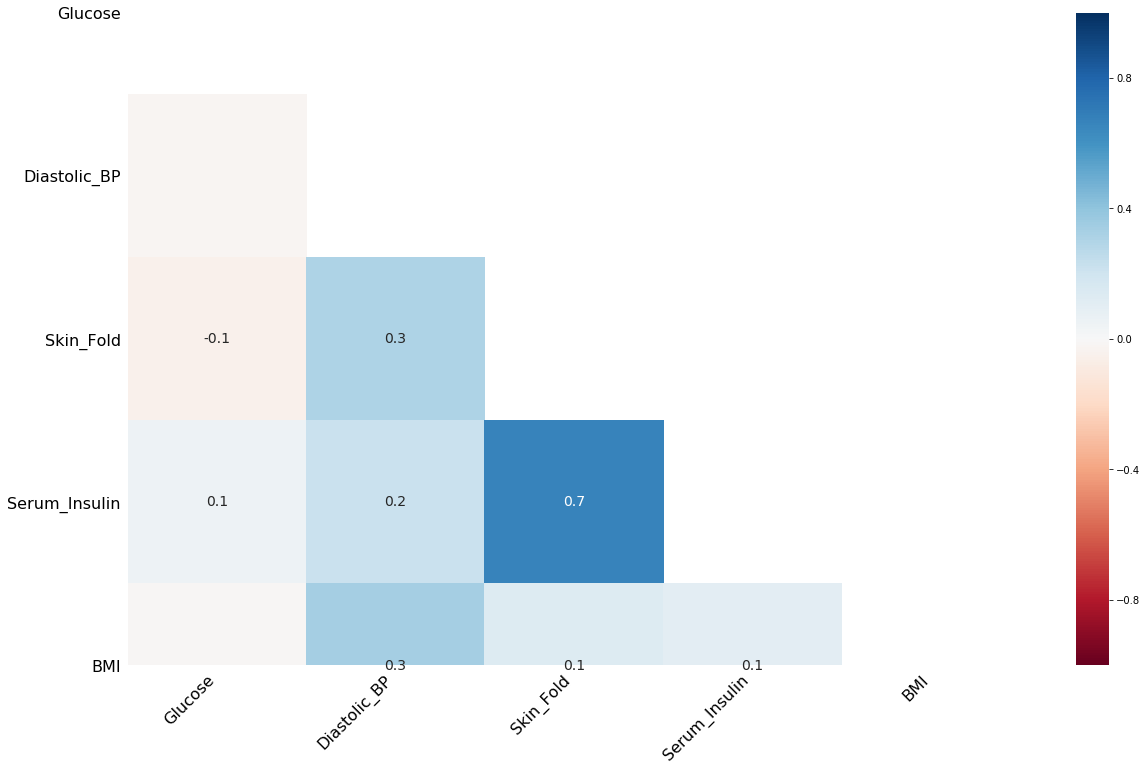

In [17]:
msno.heatmap(diabetes)

#### Correlation using dendrogram:
    
    Skin_Fold and Serum_Insulin have high corelation between them.

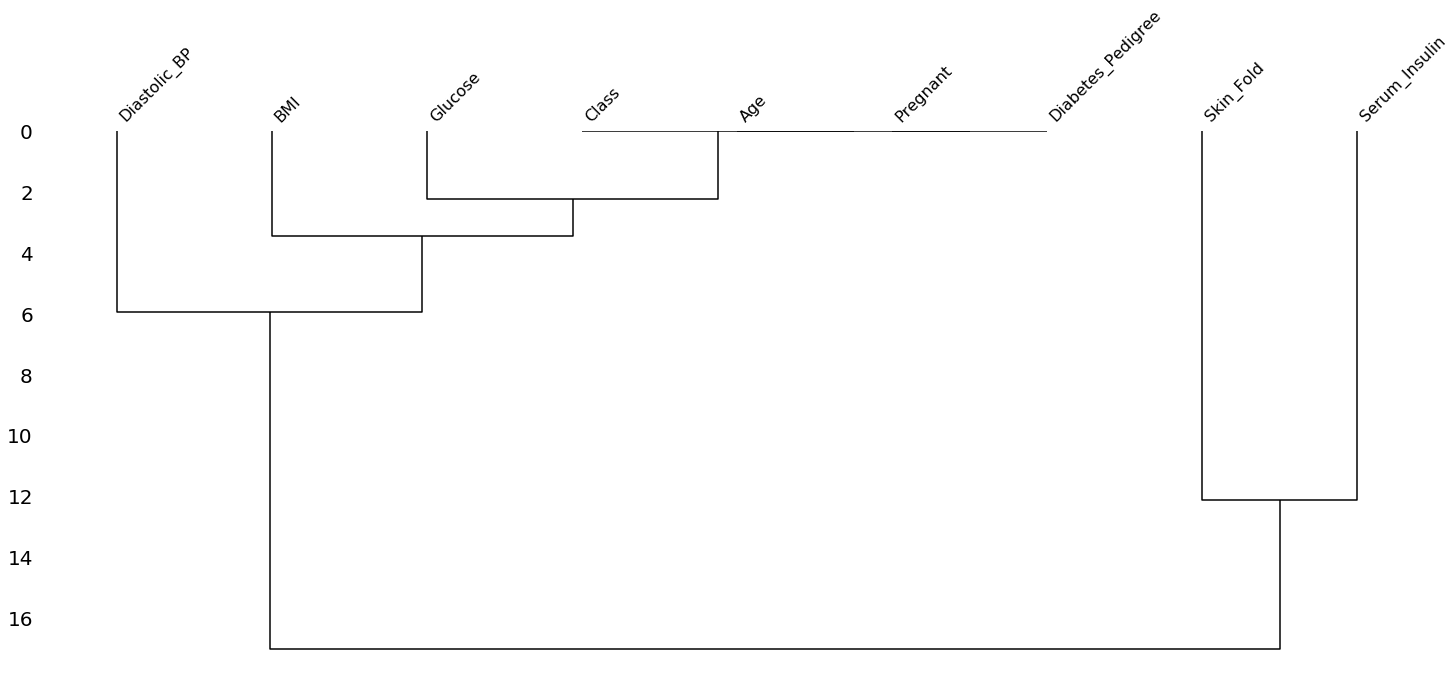

In [18]:
msno.dendrogram(diabetes)

#### Function to visualize missing values

In [19]:
def fill_dummy_values(df,scaling_factor=0.050):
    df_dummy = df.copy(deep=True)
    for col_name in df_dummy:
        col = df_dummy[col_name]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        #Scaling the data
        col_range = col.max()-col.min()
        dummy_values = (rand(num_nulls)-2)*scaling_factor * col_range + col.min()
        col[col_null] = dummy_values
    return df_dummy


#### Plotting the Scatter plot for missing values

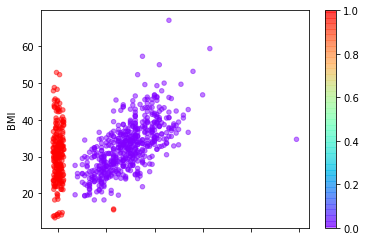

In [20]:
diabetes_dummy = fill_dummy_values(diabetes)
nullity = diabetes.Skin_Fold.isnull() + diabetes.BMI.isnull()

diabetes_dummy.plot(x='Skin_Fold',y='BMI',kind='scatter',cmap='rainbow',c=nullity,alpha=0.5)
plt.show()


#### Deletion of Missing value:
    
    a. Pairwise Deletion: Missing values are skipped when calculating. Replace with mean,median and mode.
    
    b. Listwise Deletion- When the missing value is at random. We can delete the entire row if it is small.
    
#### Delete MCAR


 Missing value matrix is as follows 



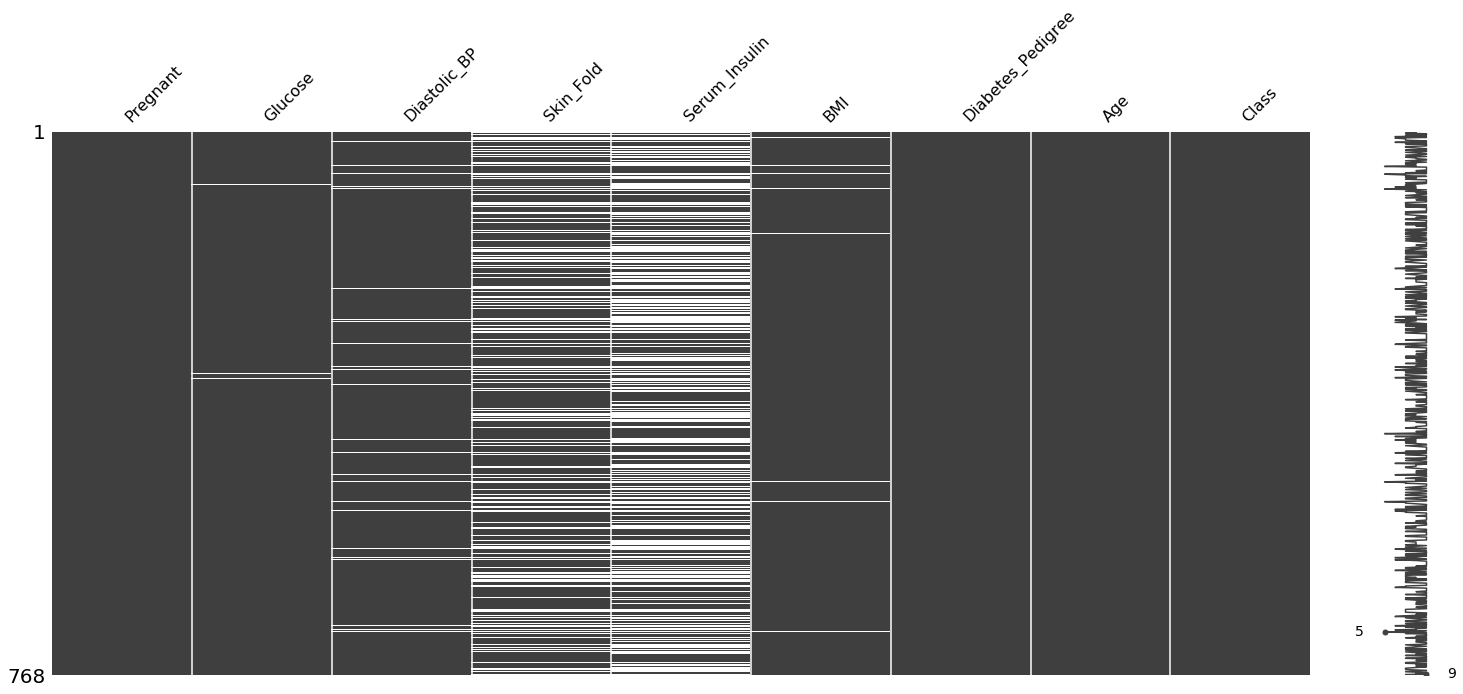

In [21]:
print('\n Missing value matrix is as follows \n')
msno.matrix(diabetes)

Count of missing value in Glucose is : 5

 Deleting of Missing value in glucose ist wise deletion

 Count of missing value in Glucose is : 0


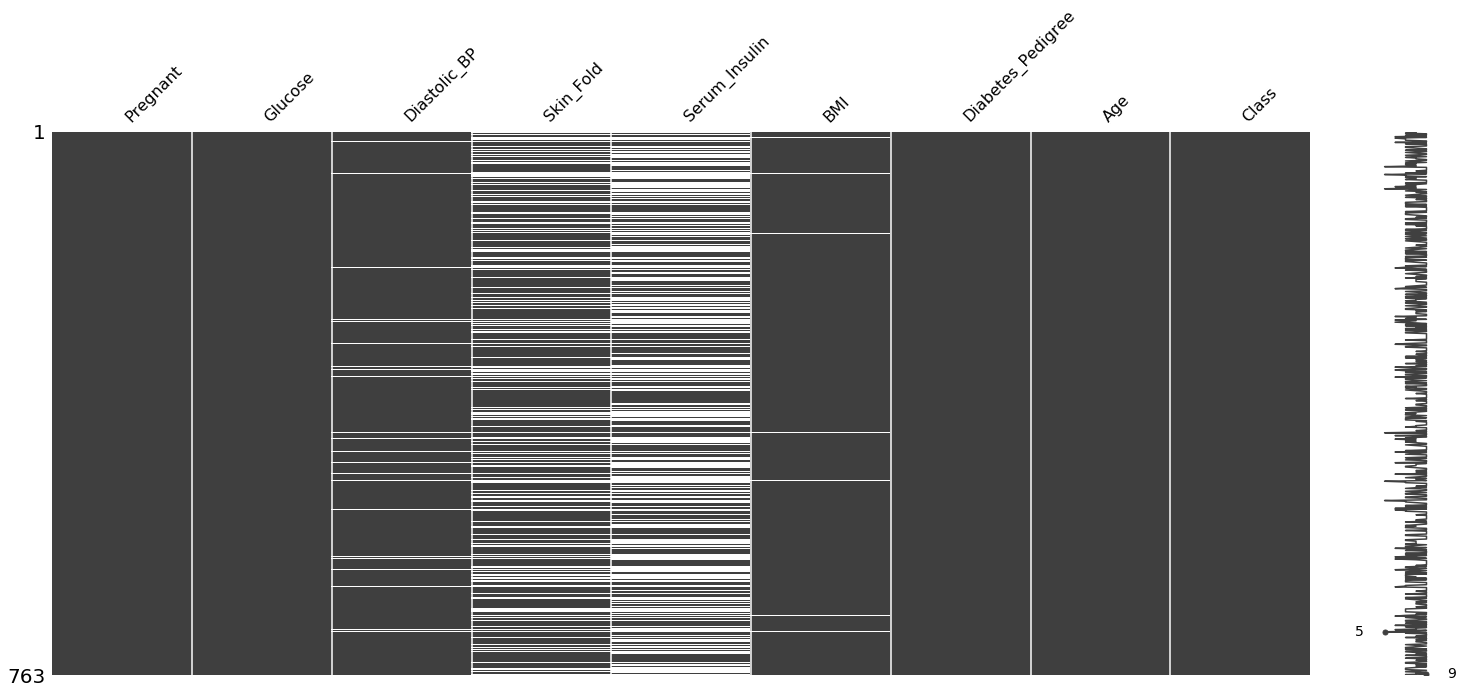

In [22]:
print('Count of missing value in Glucose is :',diabetes['Glucose'].isnull().sum())

print('\n Deleting of Missing value in glucose ist wise deletion')
diabetes.dropna(subset=['Glucose'],how='any',inplace=True)
print('\n Count of missing value in Glucose is :',diabetes['Glucose'].isnull().sum())
msno.matrix(diabetes)

#### Observation: 
    
    Drop BMI since it is missing completely at random(MCAR)
    


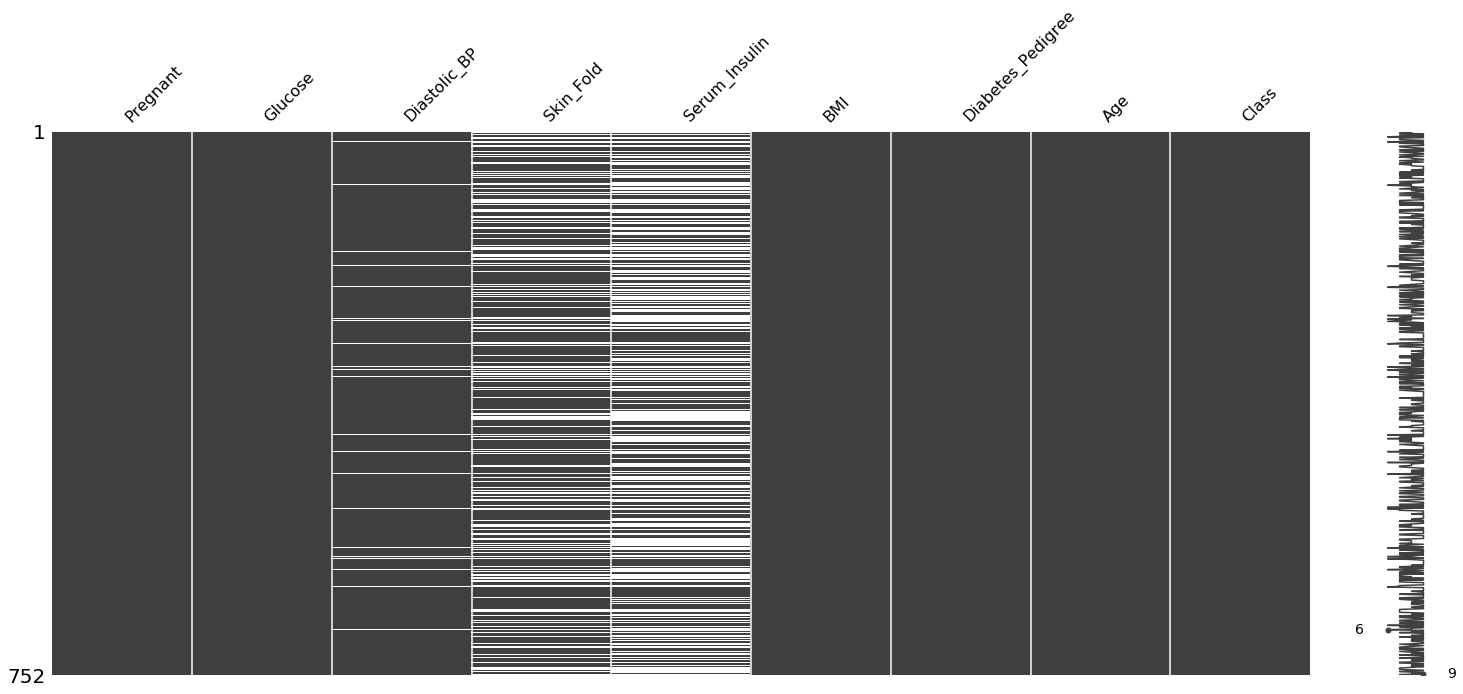

In [23]:
diabetes.dropna(subset=['BMI'],how='all',inplace=True)
msno.matrix(diabetes)

#### Imputation

Strategy for imputing using mean,median,constant and mode

#### Mean,Median and Mode Imputer

In [24]:
mean_imputer = SimpleImputer(strategy='mean')
diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

median_imputer = SimpleImputer(strategy='median')
diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)

mode_imputer = SimpleImputer(strategy='most_frequent')
diabetes_mode.iloc[:,:] = mode_imputer.fit_transform(diabetes_mode)

#### Constant Imputation

In [25]:
constant_imputer = SimpleImputer(strategy='constant',fill_value=0)
diabetes_constant.iloc[:,:] = mode_imputer.fit_transform(diabetes_constant)

#### Visualizing the plots


        Graphically compare the imputations

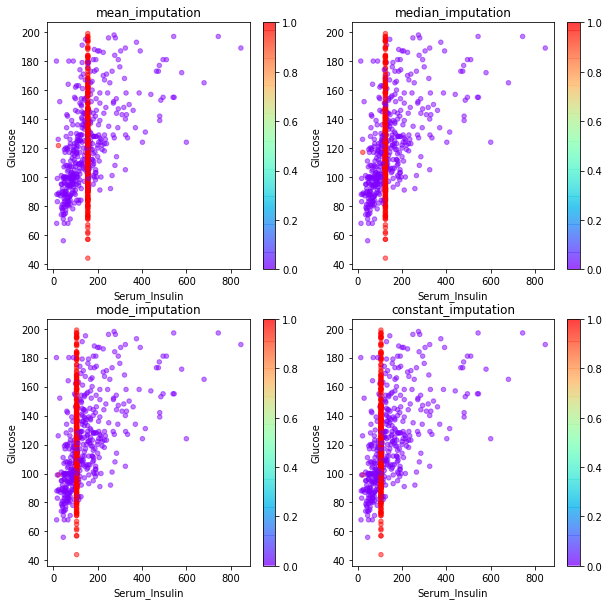

In [26]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
nullity = diabetes_cp.Serum_Insulin.isnull() + diabetes_cp.Glucose.isnull()

imputation = {'mean_imputation':diabetes_mean,
             'median_imputation':diabetes_median,
             'mode_imputation':diabetes_mode,
             'constant_imputation':diabetes_constant}

for ax,df_key in zip(axes.flatten(),imputation):
    imputation[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=True, title=df_key)

### TimeSeries Missing data Handling

In [27]:
airquality = pd.read_csv('../Python_Missing_Value/air-quality.csv')
airquality_bkup = airquality.copy(deep=True)

In [28]:
airquality.head()

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


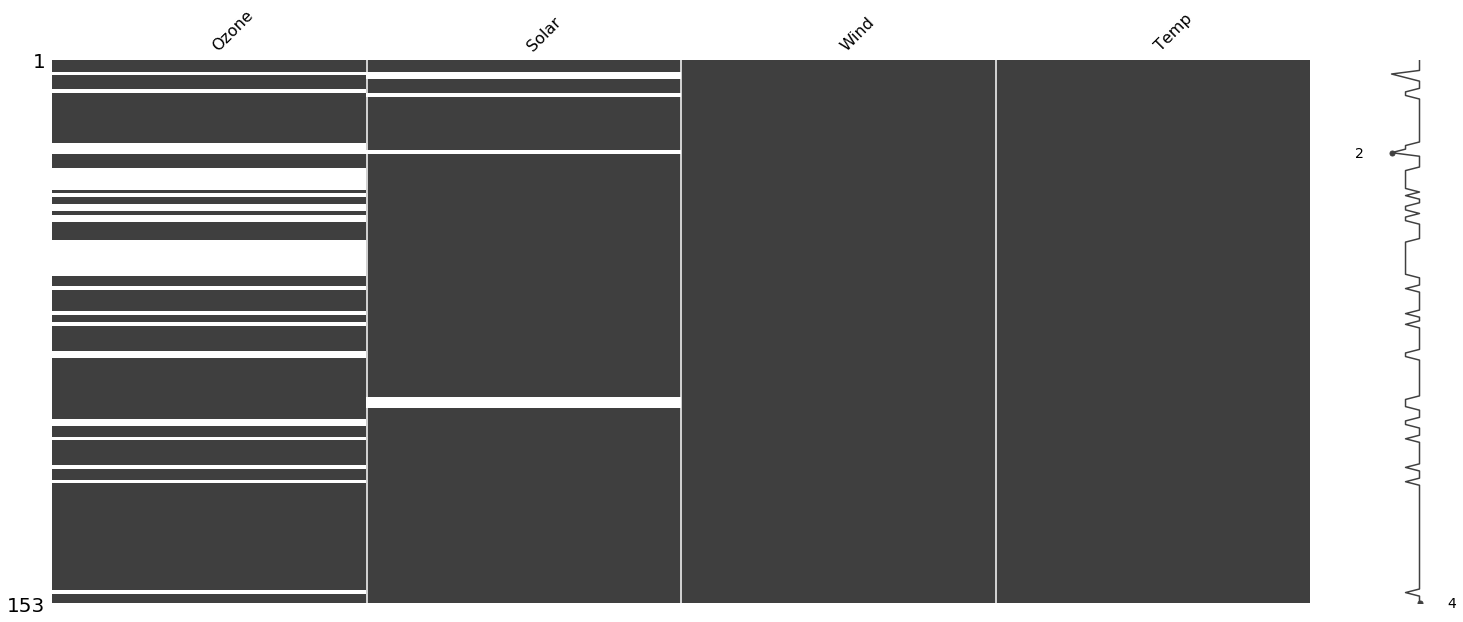

In [29]:
msno.matrix(air_quality)

In [30]:
print('\nMissing Value in air quality is \n')
airquality.isnull().sum()


Missing Value in air quality is 



Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [31]:
airquality.iloc[30:40]

,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,NaN,286.0,8.6,78
32,1976-06-02,NaN,287.0,9.7,74
33,1976-06-03,NaN,242.0,16.1,67
34,1976-06-04,NaN,186.0,9.2,84
35,1976-06-05,NaN,220.0,8.6,85
36,1976-06-06,NaN,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,NaN,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


### Impute with forward fill and backward fill method

In [32]:
airquality_org = airquality.copy(deep=True)
airquality_bkup2 = airquality.copy(deep=True)

airquality.fillna(method='ffill',inplace=True)
print('\n After applying forward fill method the dataset looks like below: \n')
airquality.iloc[30:40]


 After applying forward fill method the dataset looks like below: 



,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,37.0,286.0,8.6,78
32,1976-06-02,37.0,287.0,9.7,74
33,1976-06-03,37.0,242.0,16.1,67
34,1976-06-04,37.0,186.0,9.2,84
35,1976-06-05,37.0,220.0,8.6,85
36,1976-06-06,37.0,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,29.0,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


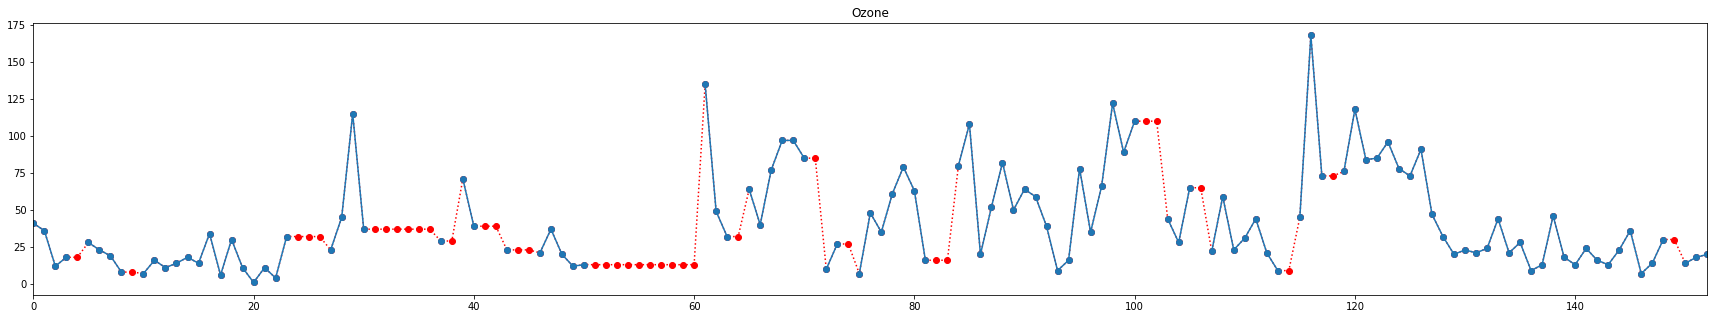

In [45]:
airquality['Ozone'].plot(color='red',linestyle='dotted',figsize=(30,5),marker='o')
airquality_org['Ozone'].plot(title='Ozone',marker='o')

In [34]:
airquality_bkup.fillna(method='bfill',inplace=True)
print('\n After applying backward fill method the dataset looks like below: \n')
airquality_bkup.iloc[30:40]


 After applying backward fill method the dataset looks like below: 



,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,29.0,286.0,8.6,78
32,1976-06-02,29.0,287.0,9.7,74
33,1976-06-03,29.0,242.0,16.1,67
34,1976-06-04,29.0,186.0,9.2,84
35,1976-06-05,29.0,220.0,8.6,85
36,1976-06-06,29.0,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,71.0,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


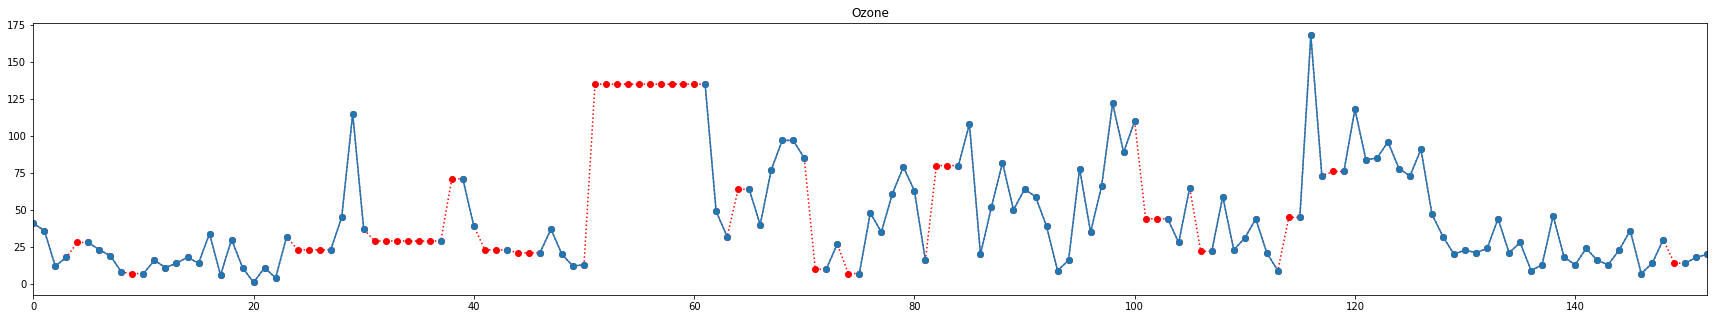

In [35]:
airquality_bkup['Ozone'].plot(color='red',linestyle='dotted',figsize=(30,5),marker='o')
airquality_org['Ozone'].plot(title='Ozone',marker='o')

#### Impute with <b>INTERPOLATE</b> method

Interpolate:- <b>Linear</b>

In [36]:
print('\n Before interpolation the missing value looks like')
airquality_bkup3 = airquality_bkup2.copy(deep=True)

airquality_bkup2.iloc[30:40]



 Before interpolation the missing value looks like


,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,NaN,286.0,8.6,78
32,1976-06-02,NaN,287.0,9.7,74
33,1976-06-03,NaN,242.0,16.1,67
34,1976-06-04,NaN,186.0,9.2,84
35,1976-06-05,NaN,220.0,8.6,85
36,1976-06-06,NaN,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,NaN,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


In [37]:
print('\n After interpolation of linear \n')
airquality_bkup2.interpolate(method='linear',inplace=True)
airquality_bkup2.iloc[30:40]


 After interpolation of linear 



,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.000000,279.0,7.4,76
31,1976-06-01,35.857143,286.0,8.6,78
32,1976-06-02,34.714286,287.0,9.7,74
33,1976-06-03,33.571429,242.0,16.1,67
34,1976-06-04,32.428571,186.0,9.2,84
35,1976-06-05,31.285714,220.0,8.6,85
36,1976-06-06,30.142857,264.0,14.3,79
37,1976-06-07,29.000000,127.0,9.7,82
38,1976-06-08,50.000000,273.0,6.9,87
39,1976-06-09,71.000000,291.0,13.8,90


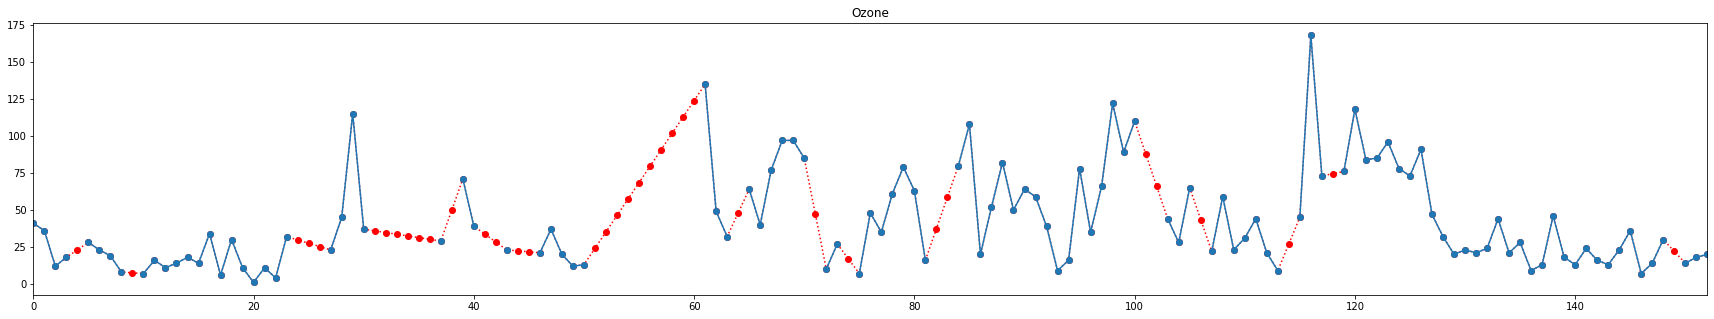

In [38]:
airquality_bkup2['Ozone'].plot(color='red',linestyle='dotted',figsize=(30,5),marker='o')
airquality_org['Ozone'].plot(title='Ozone',marker='o')

In [39]:
print('\n Before quadratic interpolation the missing value looks like')
airquality_bkup4 = airquality_bkup3.copy(deep=True)
airquality_bkup3.iloc[30:40]



 Before quadratic interpolation the missing value looks like


,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,NaN,286.0,8.6,78
32,1976-06-02,NaN,287.0,9.7,74
33,1976-06-03,NaN,242.0,16.1,67
34,1976-06-04,NaN,186.0,9.2,84
35,1976-06-05,NaN,220.0,8.6,85
36,1976-06-06,NaN,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,NaN,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


In [40]:
print('\n After quadratic interpolation the missing value looks like')
airquality_bkup3.interpolate(method='quadratic',inplace=True)
airquality_bkup3.iloc[30:40]


 After quadratic interpolation the missing value looks like


,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.000000,279.0,7.4,76
31,1976-06-01,-38.361123,286.0,8.6,78
32,1976-06-02,-79.352735,287.0,9.7,74
33,1976-06-03,-85.974836,242.0,16.1,67
34,1976-06-04,-62.354606,186.0,9.2,84
35,1976-06-05,-33.255133,220.0,8.6,85
36,1976-06-06,-2.803598,264.0,14.3,79
37,1976-06-07,29.000000,127.0,9.7,82
38,1976-06-08,62.155660,273.0,6.9,87
39,1976-06-09,71.000000,291.0,13.8,90


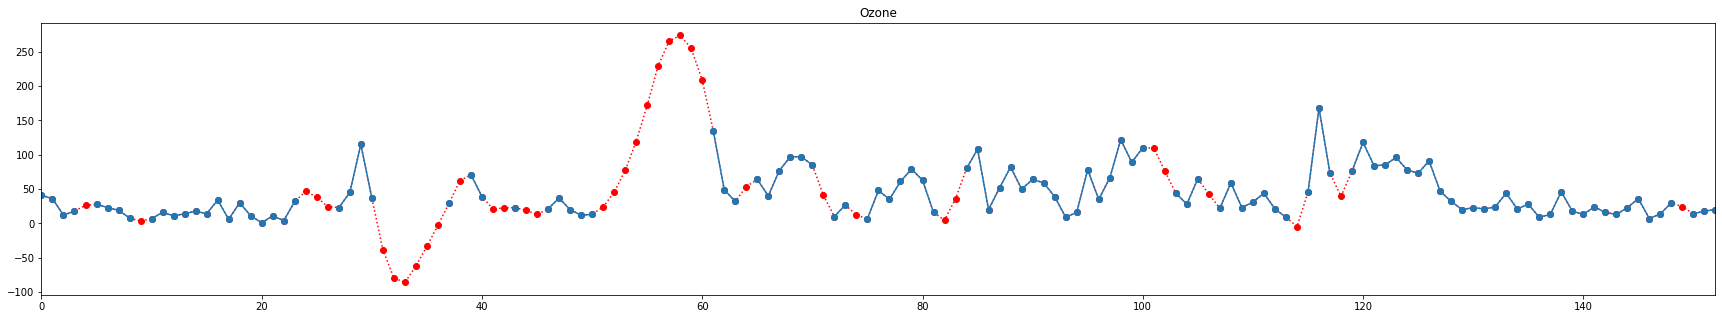

In [41]:
airquality_bkup3['Ozone'].plot(color='red',linestyle='dotted',figsize=(30,5),marker='o')
airquality_org['Ozone'].plot(title='Ozone',marker='o')

In [42]:
print('\n Before nearest interpolation the missing value looks like')
airquality_bkup4.iloc[30:40]


 Before nearest interpolation the missing value looks like


,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,NaN,286.0,8.6,78
32,1976-06-02,NaN,287.0,9.7,74
33,1976-06-03,NaN,242.0,16.1,67
34,1976-06-04,NaN,186.0,9.2,84
35,1976-06-05,NaN,220.0,8.6,85
36,1976-06-06,NaN,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,NaN,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


In [43]:
airquality_bkup4.interpolate(method='nearest',inplace=True)
print('After nearest interpolation, missing value looks like')
airquality_bkup4.iloc[30:40]

After nearest interpolation, missing value looks like


,Date,Ozone,Solar,Wind,Temp
30,1976-05-31,37.0,279.0,7.4,76
31,1976-06-01,37.0,286.0,8.6,78
32,1976-06-02,37.0,287.0,9.7,74
33,1976-06-03,37.0,242.0,16.1,67
34,1976-06-04,29.0,186.0,9.2,84
35,1976-06-05,29.0,220.0,8.6,85
36,1976-06-06,29.0,264.0,14.3,79
37,1976-06-07,29.0,127.0,9.7,82
38,1976-06-08,29.0,273.0,6.9,87
39,1976-06-09,71.0,291.0,13.8,90


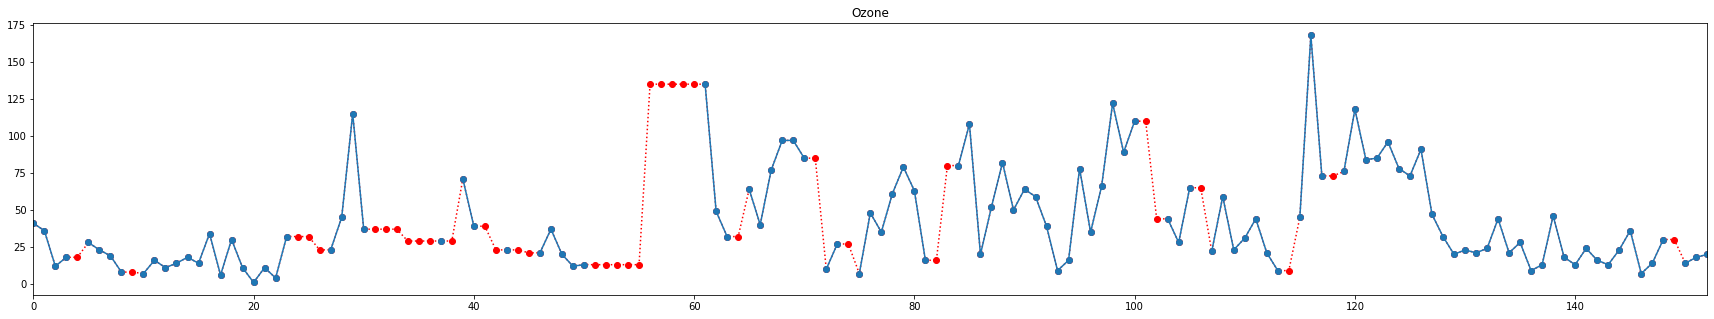

In [44]:
airquality_bkup4['Ozone'].plot(color='red',linestyle='dotted',figsize=(30,5),marker='o')
airquality_org['Ozone'].plot(title='Ozone',marker='o')